In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy as scipy
import scipy.signal
import pywt 

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import sklearn.decomposition as decomposition

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\rg654th\Downloads\other\Exoplanet\Data\exoplanetTotal.csv')
datadf = pd.DataFrame(data)
datadf.head(3)

,Exoplanet_Yes,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67


In [3]:
df_train, df_test = train_test_split(datadf, test_size=0.2, stratify=datadf['Exoplanet_Yes'])
# Must split before preprocessing to avoid test data leaking in
# Split into train and test set using stratified sampling

xtrain = df_train.drop('Exoplanet_Yes', axis=1)
ytrain = df_train['Exoplanet_Yes']

xtest = df_test.drop('Exoplanet_Yes', axis=1)
ytest = df_test['Exoplanet_Yes']

In [4]:
df_train.groupby('Exoplanet_Yes').count()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
Exoplanet_Yes,,,,,,,,,,,,,,,,,,,,,
0,4491,4491,4491,4491,4491,4491,4491,4491,4491,4491,...,4491,4491,4491,4491,4491,4491,4491,4491,4491,4491
1,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34


In [5]:
df_test.groupby('Exoplanet_Yes').count()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
Exoplanet_Yes,,,,,,,,,,,,,,,,,,,,,
0,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,...,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124
1,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


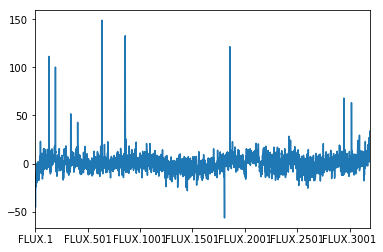

In [6]:
# Simple initial plot
xtrain.iloc[0,].plot()
plt.show()

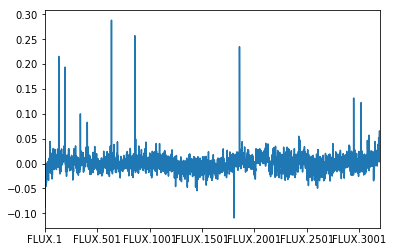

In [7]:
# Normalise Flux Data
normal_xtrain = pd.DataFrame(preprocessing.normalize(xtrain), columns=xtrain.columns)
normal_xtrain.iloc[0,].plot()
plt.show()

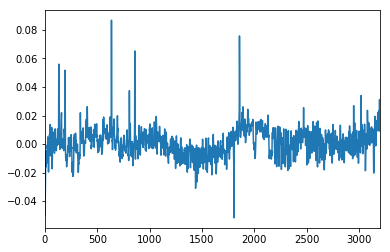

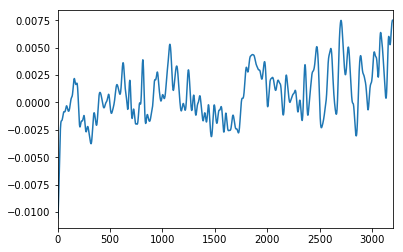

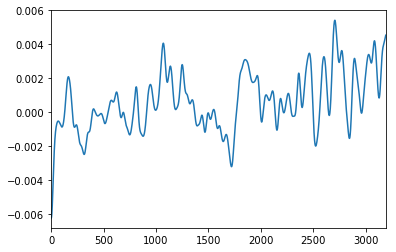

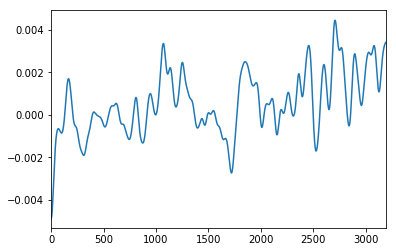

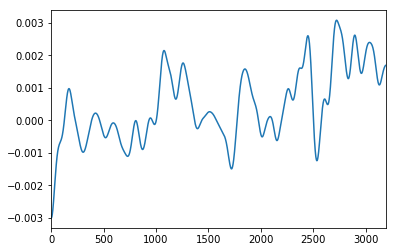

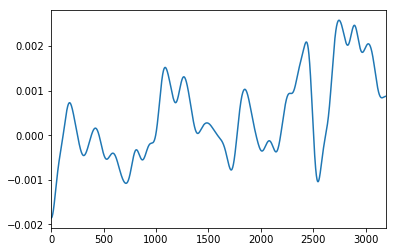

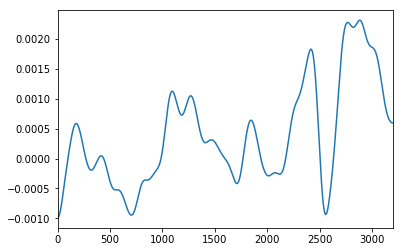

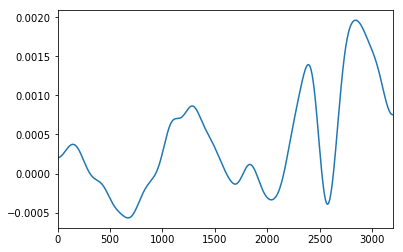

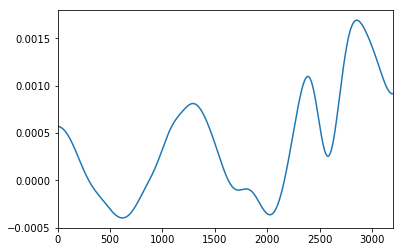

In [8]:
# Initially used Gaussian Filter
sigma_vals = [1,10,16,20,30,40,50,75,100]
k = 0

for i in sigma_vals:
    pd.DataFrame(scipy.ndimage.gaussian_filter(normal_xtrain, sigma = i)).iloc[k,].plot()
    plt.show()

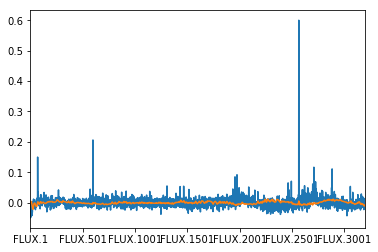

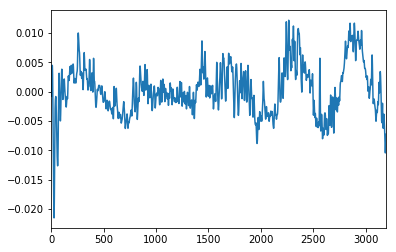

In [9]:
normal_xtrain.iloc[50,].plot()
pd.DataFrame(scipy.ndimage.gaussian_filter(normal_xtrain, sigma = 3)).iloc[50,].plot()
plt.show()

pd.DataFrame(scipy.ndimage.gaussian_filter(normal_xtrain, sigma = 3)).iloc[50,].plot()
plt.show()

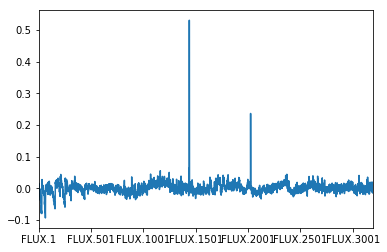

C:\Users\rg654th\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


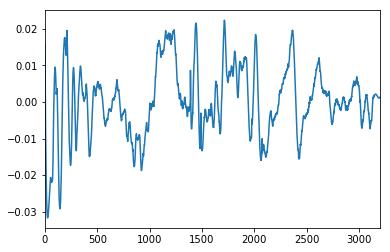

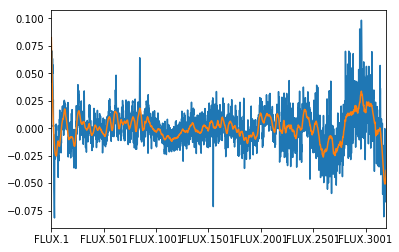

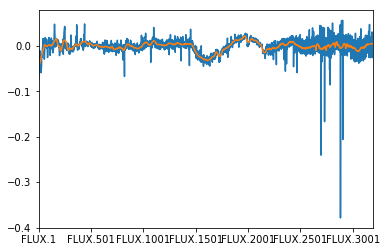

In [10]:
# Filtering using Savitzky Golay Filter
p=4
w=101

normal_xtrain.iloc[51,].plot()
plt.show()
pd.DataFrame(scipy.signal.savgol_filter(normal_xtrain, window_length=w, polyorder=p)).iloc[51,].plot()
plt.show()
normal_xtrain.iloc[52,].plot()
pd.DataFrame(scipy.signal.savgol_filter(normal_xtrain, window_length=w, polyorder=p)).iloc[52,].plot()
plt.show()
normal_xtrain.iloc[53,].plot()
pd.DataFrame(scipy.signal.savgol_filter(normal_xtrain, window_length=w, polyorder=p)).iloc[53,].plot()
plt.show()

In [11]:
p=4
w=101

savgol_xtrain = pd.DataFrame(scipy.signal.savgol_filter(normal_xtrain, window_length=w, polyorder=p), columns=xtrain.columns)

C:\Users\rg654th\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [12]:
# Standardizing/Scaling
scaler = preprocessing.StandardScaler()
final_xtrain = pd.DataFrame(scaler.fit_transform(savgol_xtrain), columns=xtrain.columns)

In [13]:
# final_xtest
normal_xtest = pd.DataFrame(preprocessing.normalize(xtest), columns=xtest.columns)
savgol_xtest = pd.DataFrame(scipy.signal.savgol_filter(normal_xtest, window_length=w, polyorder=p), columns=xtest.columns)
final_xtest = pd.DataFrame(scaler.fit_transform(savgol_xtest), columns=xtest.columns)

C:\Users\rg654th\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [14]:
# Convert to CSV
final_xtest.to_csv("final_xtest.csv", index=False)
final_xtrain.to_csv("final_xtrain.csv", index=False)

ytest.to_csv("final_ytest.csv", index=False)
ytrain.to_csv("final_ytrain.csv", index=False)